**IMPORT MODULES**

In [81]:
import pandas as pd

**LOAD DATASET**

In [82]:
car_df = pd.read_csv('/content/drive/MyDrive/CAR DETAILS .csv')
car_df.head() #menampilkan 5 baris pertama

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


**DROP COLUMN 'TRANSMISSION'**

In [83]:
car_df.drop(columns='transmission', inplace=True) # menghapus kolom bernama 'transmission'
car_df.head() # menampilkan 5 baris pertama

,name,year,selling_price,km_driven,fuel,seller_type,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Second Owner


**IDENTIFY THE SHAPE OF THE DATASET**

In [84]:
car_df.shape # bentuk/dimensi dataset (baris,kolom)

(4340, 7)

**Get the list of columns**

In [85]:
car_df.columns # daftar nama kolom

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'owner'],
      dtype='object')

**Identify data types for each column**

In [86]:
car_df.dtypes # tipe data untuk tiap kolom

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
owner            object
dtype: object

**Get bassic dataset information**

In [87]:
car_df.info() # informasi dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   owner          4340 non-null   object
dtypes: int64(3), object(4)
memory usage: 237.5+ KB


**Identify missing values**

In [88]:
car_df.isna().values.any() # mendeteksi keberadaan nilai kosong

False

**Identify duplicate entries/rows**

In [89]:
car_df[car_df.duplicated()] # tampilkan hanya baris duplikasi sekunder

,name,year,selling_price,km_driven,fuel,seller_type,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Second Owner
...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,First Owner


In [90]:
car_df.duplicated().value_counts() # hitung jumlah duplikasi data

False    3577
True      763
dtype: int64

**Drop duplicate entries/rows**

In [91]:
car_df.drop_duplicates(inplace=True) # menghapus duplikasi data
car_df.shape

(3577, 7)

**Describe the dataset**

In [92]:
car_df.describe() # deskripsi data

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


**Correlation Matrix**

In [93]:
car_df.corr() # korelasi antar kolom

,year,selling_price,km_driven
year,1.00000,0.424260,-0.417490
selling_price,0.42426,1.000000,-0.187359
km_driven,-0.41749,-0.187359,1.000000


**Dataset: Data Visualisation**

In [94]:
import matplotlib.pyplot as plt # visualisasi data
import seaborn as sns # visualisasi data

# output dari visualisasi data akan diarahkan ke notebook
%matplotlib inline 

**Heatmap**

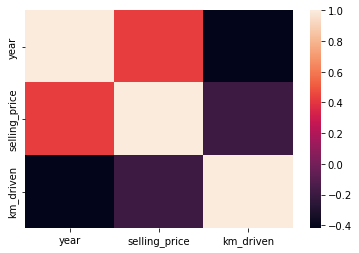

In [95]:
sns.heatmap(data=car_df.corr())

**Bar Plot**

In [96]:
car_df['year'].value_counts() # menghitung jumlah setiap year

2017    346
2012    338
2015    332
2014    321
2013    298
2018    295
2016    283
2011    247
2010    210
2009    169
2019    162
2008    129
2007    117
2006     93
2005     61
2020     45
2004     38
2003     22
2002     18
2001     16
2000     12
1999      9
1998      9
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64

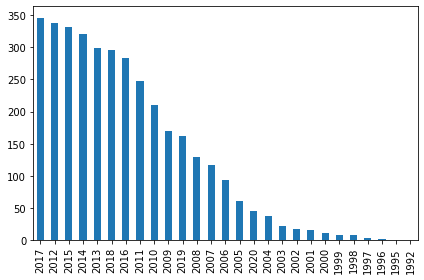

In [97]:
car_df['year'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

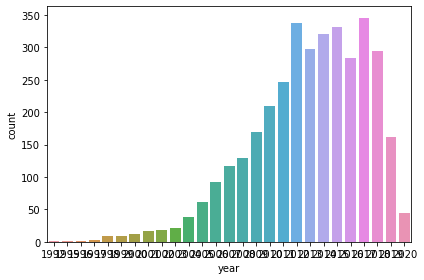

In [98]:
sns.countplot(data=car_df, x='year')
plt.tight_layout()
# sns.countplot?

**Pie Chart**

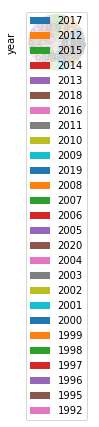

In [99]:
car_df['year'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()

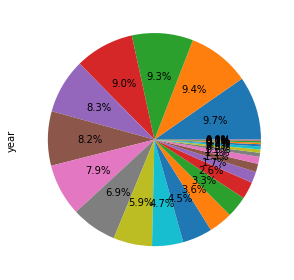

In [100]:
car_df['year'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=False)
plt.tight_layout()

**Line Plot**

Text(0.5, 1.0, 'Number of Kilometres the car is driven')

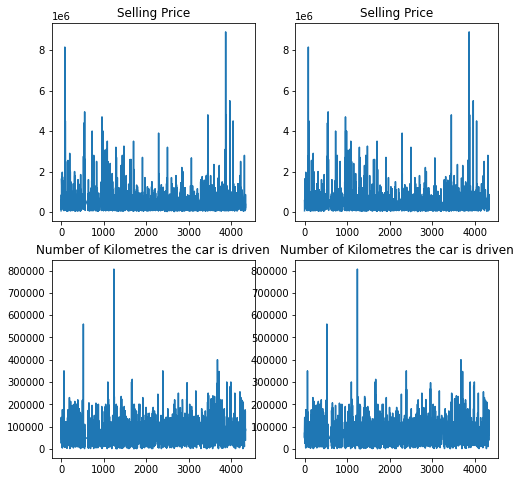

In [101]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

car_df['selling_price'].plot.line(ax=ax[0][0])
ax[0][0].set_title('Selling Price')

car_df['selling_price'].plot.line(ax=ax[0][1])
ax[0][1].set_title('Selling Price')

car_df.km_driven.plot.line(ax=ax[1][0])
ax[1][0].set_title('Number of Kilometres the car is driven')

car_df.km_driven.plot.line(ax=ax[1][1])
ax[1][1].set_title('Number of Kilometres the car is driven')

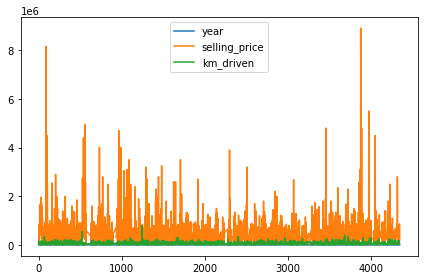

In [102]:
car_df.plot()
plt.tight_layout()

**Histogram**

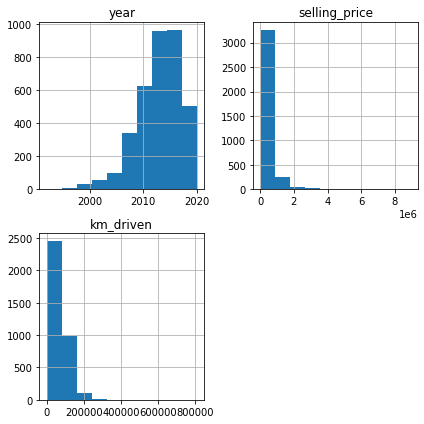

In [103]:
car_df.hist(figsize=(6,6), bins=10)
plt.tight_layout()

**Boxplot**

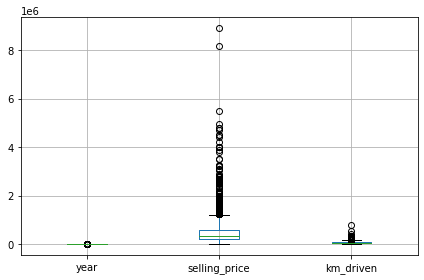

In [104]:
car_df.boxplot()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


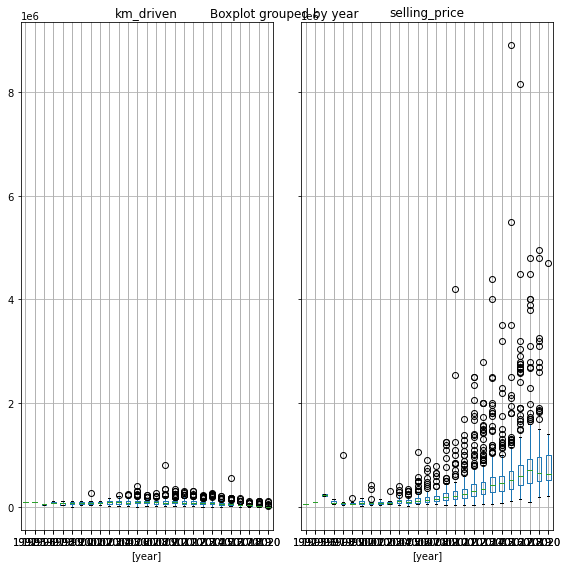

In [105]:
car_df.boxplot(by="year", figsize=(8,8))
plt.tight_layout()

**Scatter Plot**

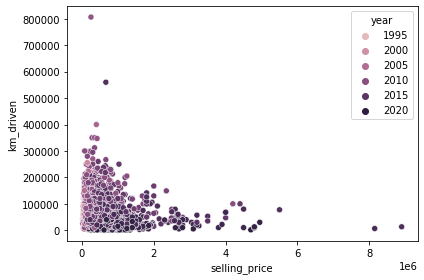

In [106]:
sns.scatterplot(x='selling_price', y='km_driven', data=car_df, hue='year')
plt.tight_layout()

**Pair Ploat**

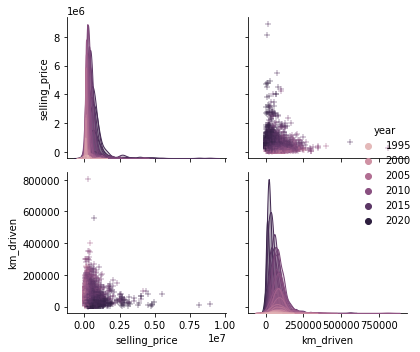

In [107]:
sns.pairplot(car_df, hue='year', markers='+')
plt.tight_layout()

**Violin Plot**

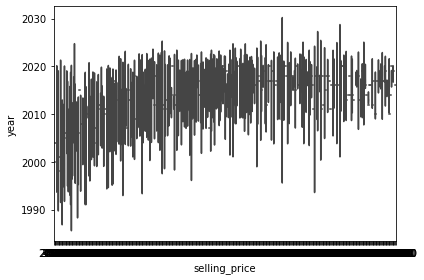

In [108]:
sns.violinplot(data=car_df, y='year', x='selling_price', inner='quartile')
plt.tight_layout()

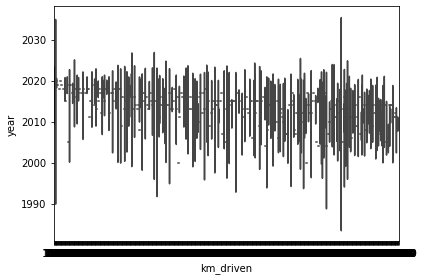

In [109]:
sns.violinplot(data=car_df, y='year', x='km_driven', inner='quartile')
plt.tight_layout()